In [1]:
from google.colab import files
uploaded = files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [2]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv("gas_turbines.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


#TEY is our Y veriable  so we are kepping this  to the last

In [4]:
df = df[[col for col in df.columns if col != 'TEY'] + ['TEY']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   CDP     15039 non-null  float64
 8   CO      15039 non-null  float64
 9   NOX     15039 non-null  float64
 10  TEY     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [9]:
df.describe()

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           CDP            CO           NOX  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183     12.102353      1.972499     68.190934   
std       16.527806      7.866803      1.103196      2.222206     10.470586   
min     1000.800000    512.450000      9.904400      0.000388     27.765000   
25%     1079.600000    542.170000     11.622000      0.858055     61.303500   
50%     1088.700000    549.890000     12.025000      1.390200     66.601000   
75%     1096.000000    550.060000     12.578000      2.160400     73.935500   
max     1100.800000    550.610000     15.081000     44.103000    119.890000   

                TEY  
count  15039.000000  
mean     134.188464  
std       15.829717  
min      100.170000  
25%      127.985000  
50%      133.780000  
75%      140.895000  
max      174.610000

In [10]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
TEY     0
dtype: int64

In [24]:
df.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
CDP      3611
CO      13096
NOX     11996
TEY      4207
dtype: int64

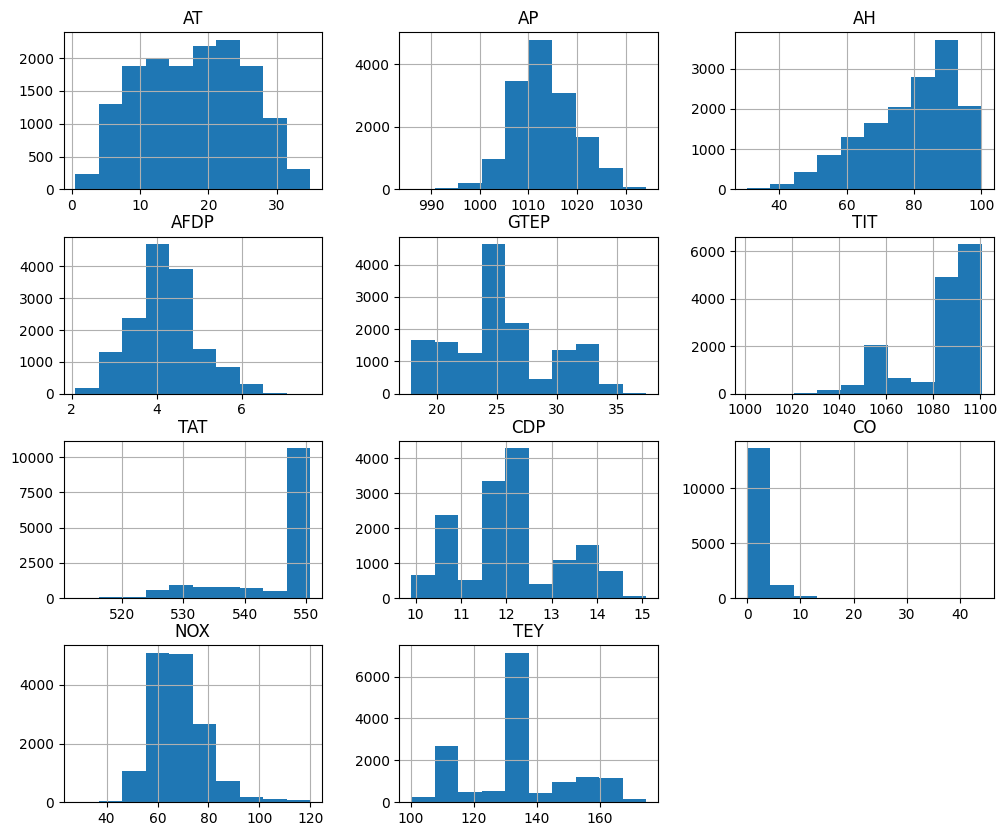

In [12]:
df.hist(figsize=(12,10))
plt.show()

<Axes: >

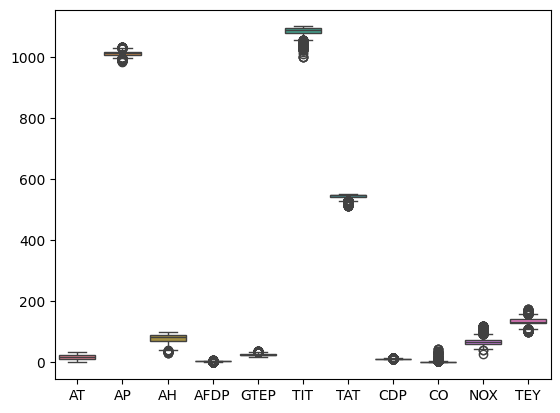

In [14]:
sns.boxplot(df)

Almost every column has outliersnbut we will keep it


More Clear View

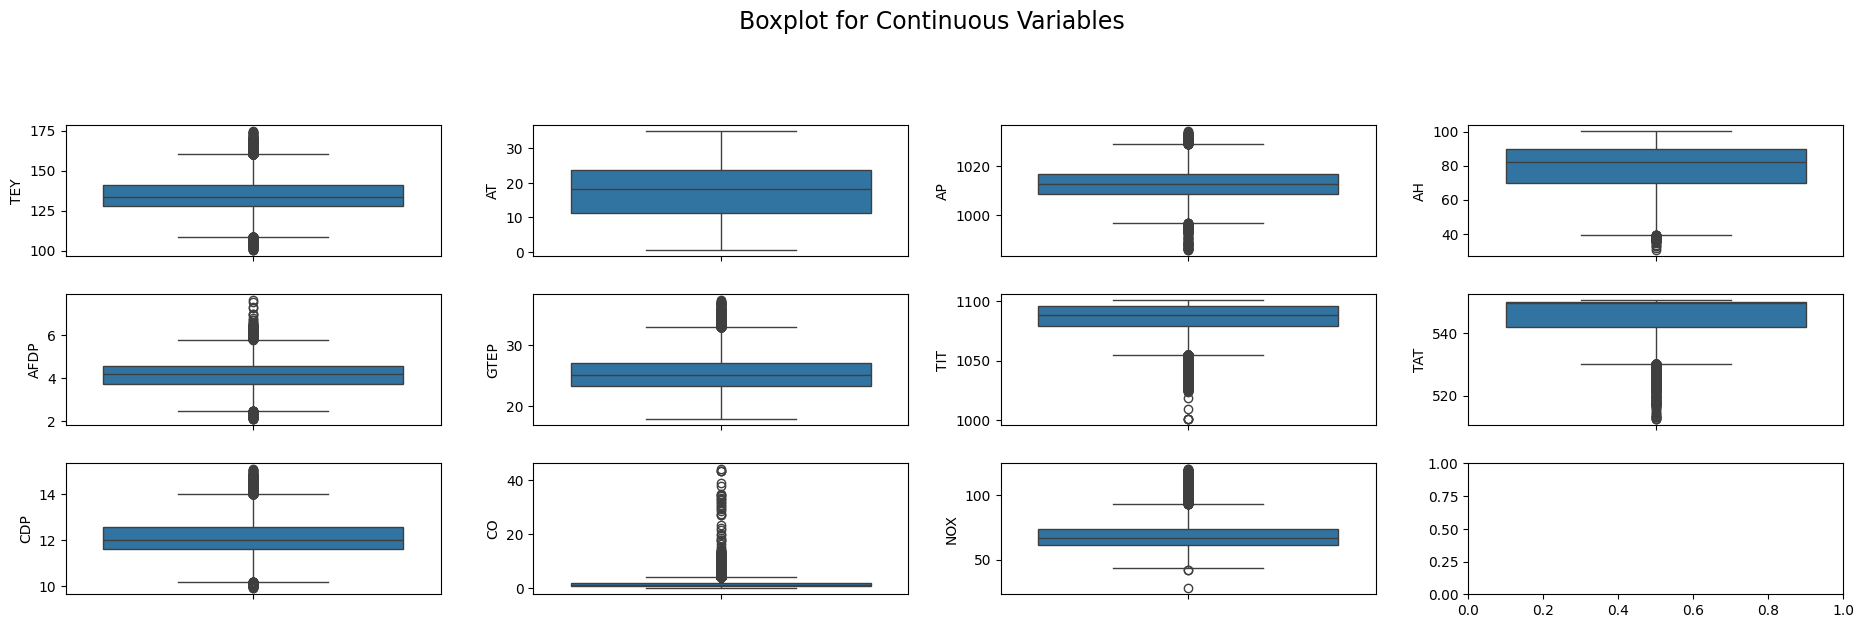

In [25]:
#check for outliers
fig, ax=plt.subplots(3,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(df.TEY, ax=ax[0,0])
sns.boxplot(df.AT, ax=ax[0,1])
sns.boxplot(df.AP, ax=ax[0,2])
sns.boxplot(df.AH, ax=ax[0,3])
sns.boxplot(df.AFDP, ax=ax[1,0])
sns.boxplot(df.GTEP, ax=ax[1,1])
sns.boxplot(df.TIT, ax=ax[1,2])
sns.boxplot(df.TAT, ax=ax[1,3])
sns.boxplot(df.CDP, ax=ax[2,0])
sns.boxplot(df.CO, ax=ax[2,1])
sns.boxplot(df.NOX, ax=ax[2,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

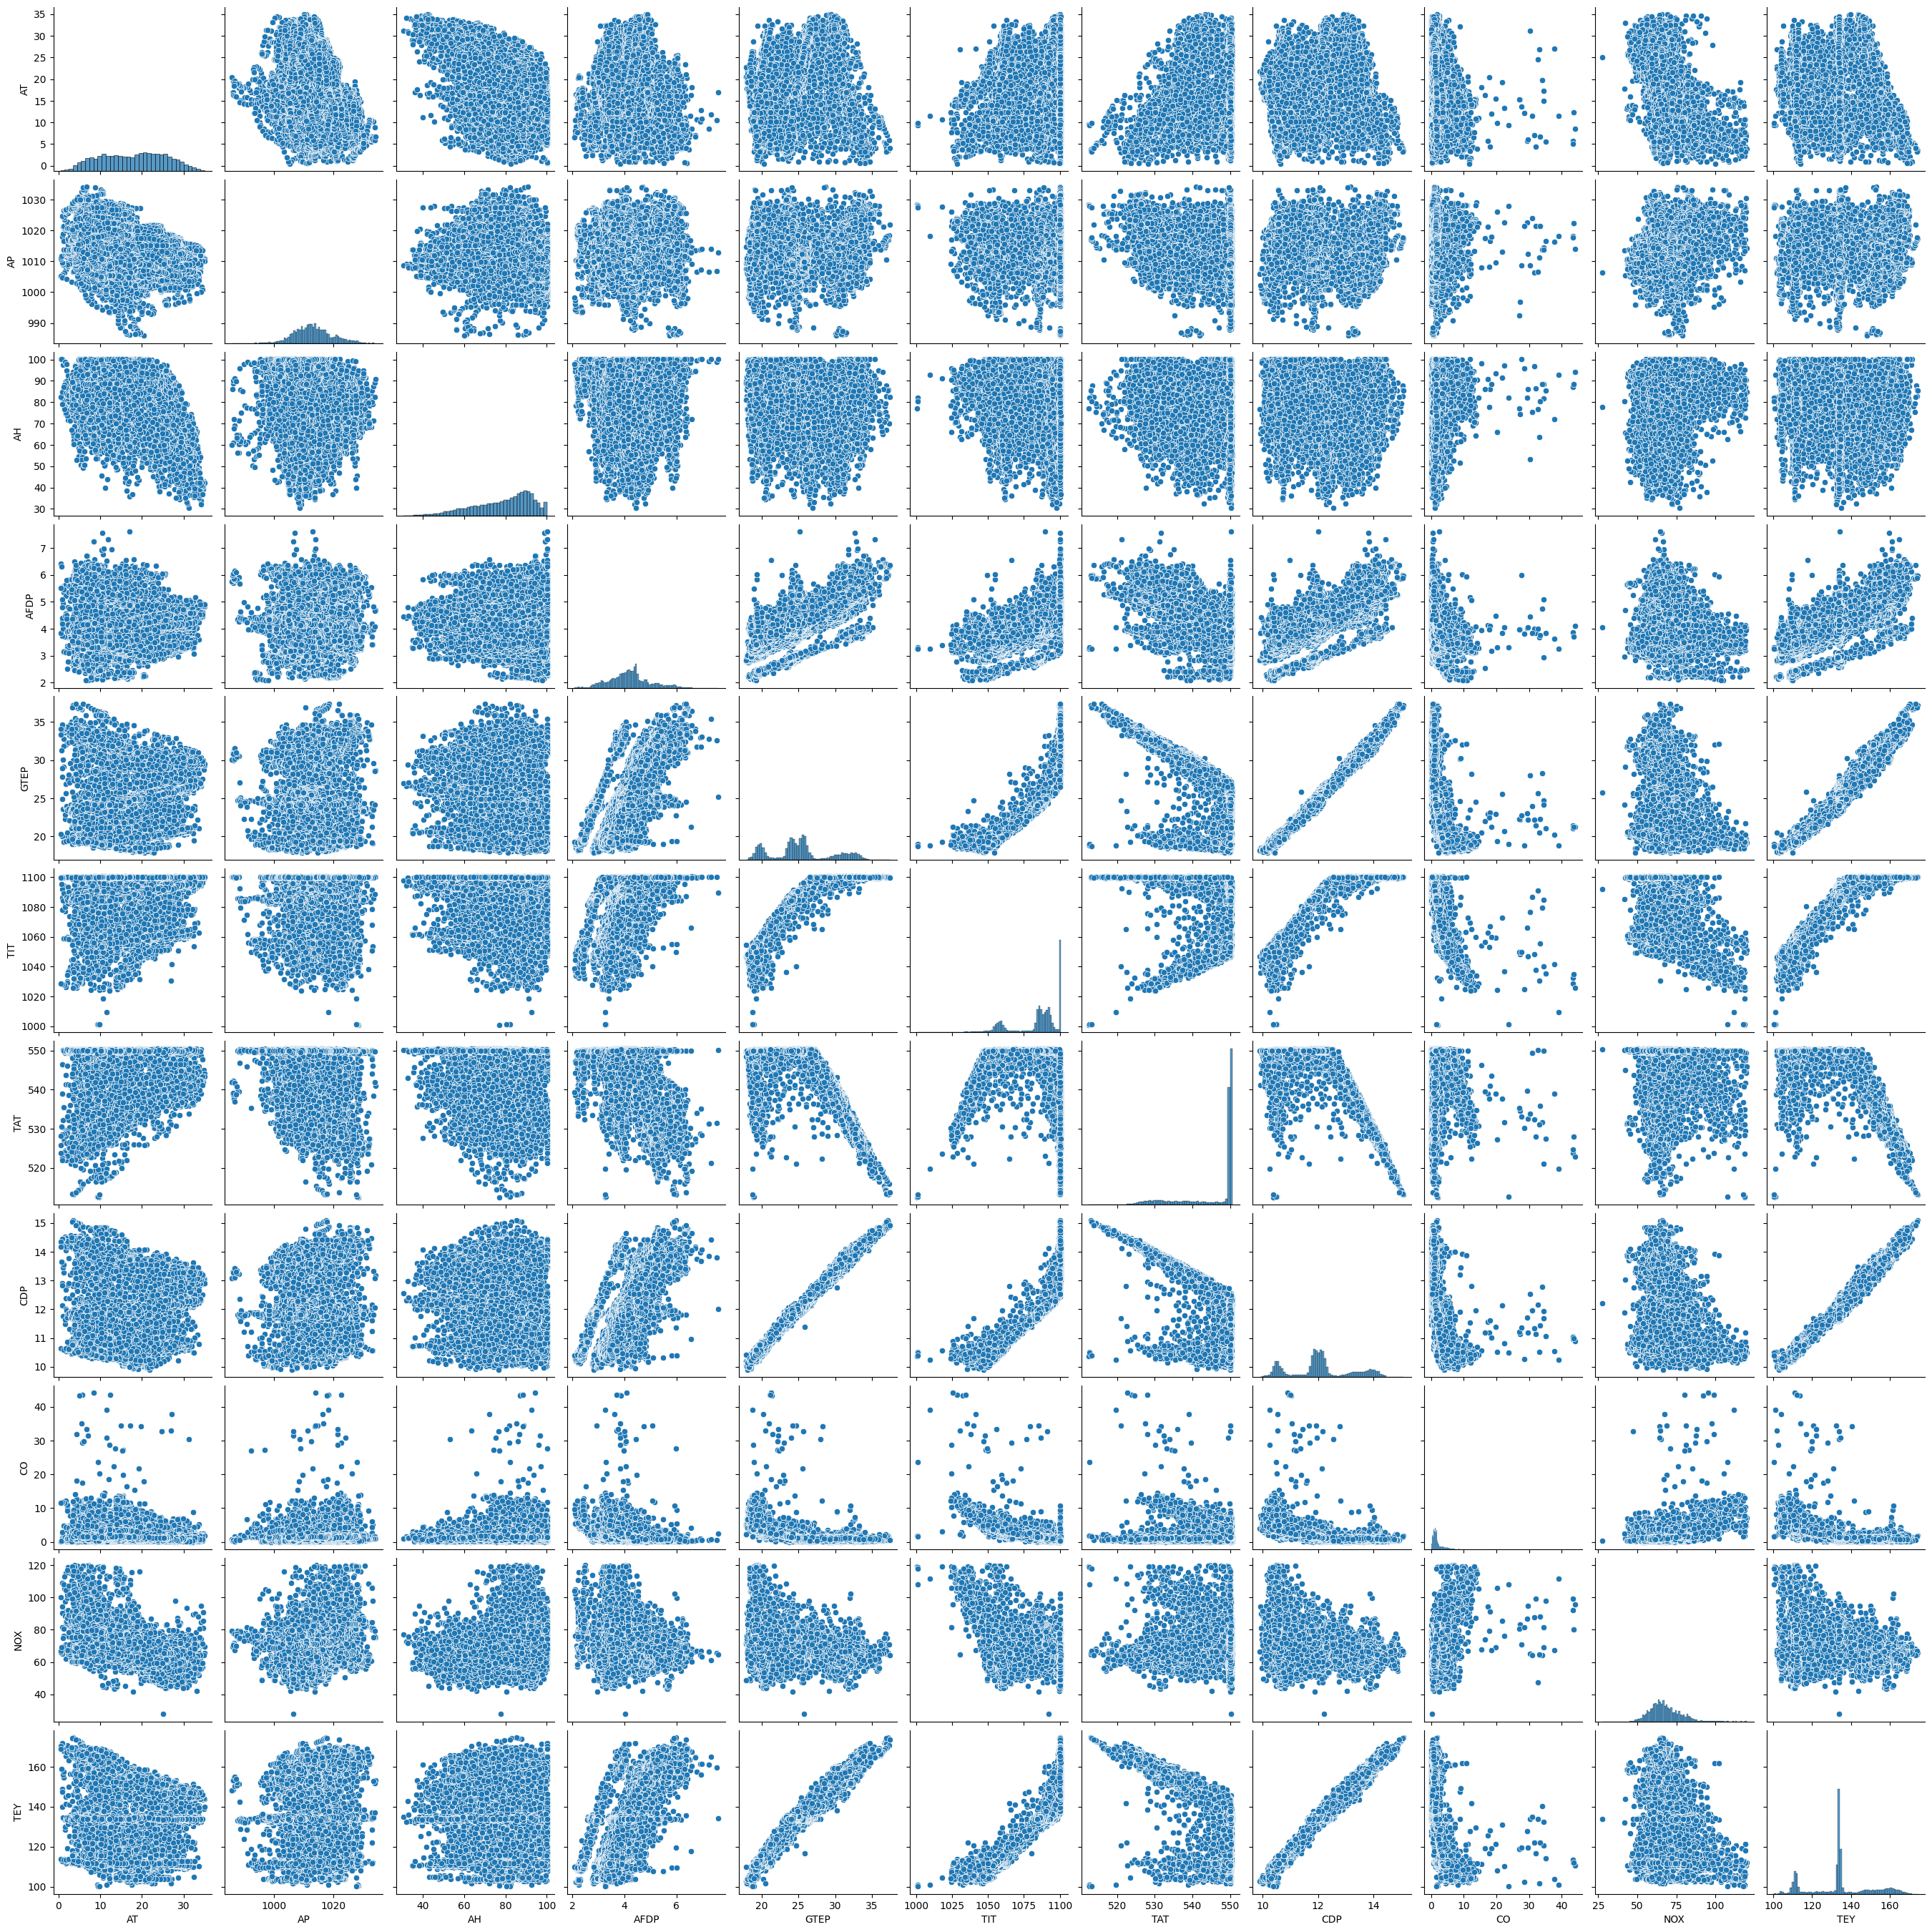

In [26]:
sns.pairplot(df)

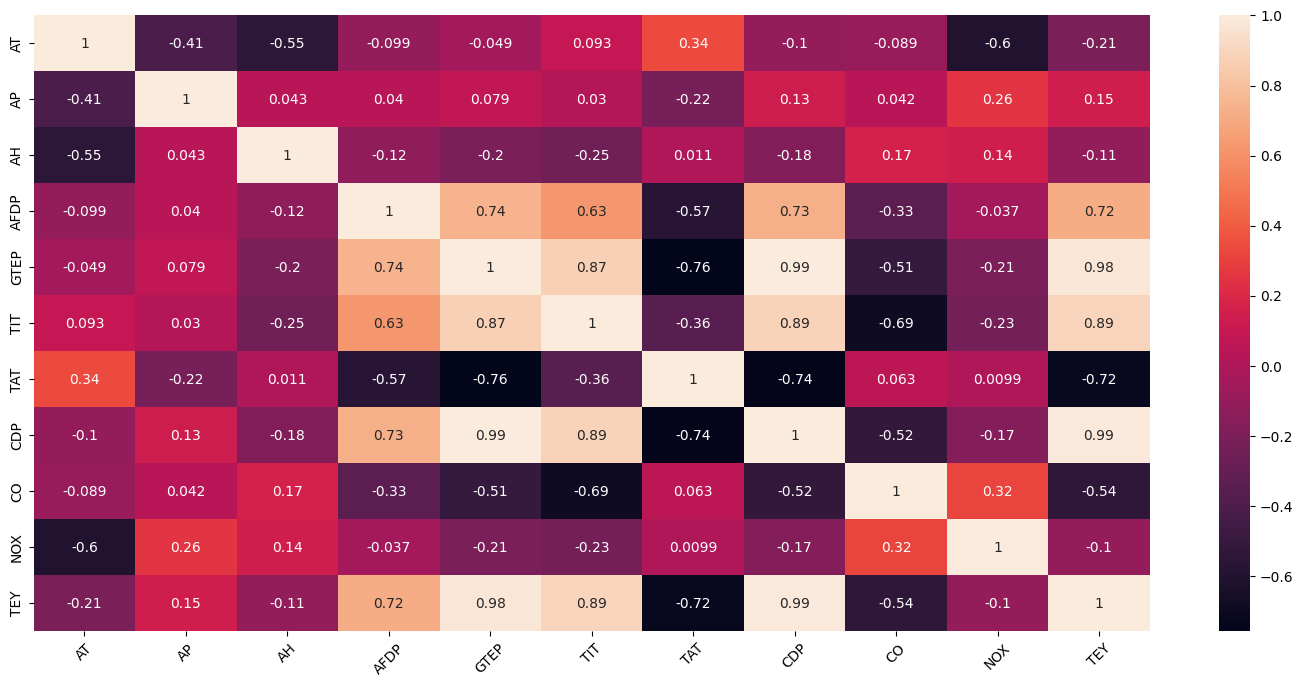

In [21]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45)
plt.show()

Skew: 0.14596270190452942
Kurtosis: -0.4870582497451621


<ipython-input-22-9b9f1cb36e2b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df['TEY'], shade = True, color ='g')


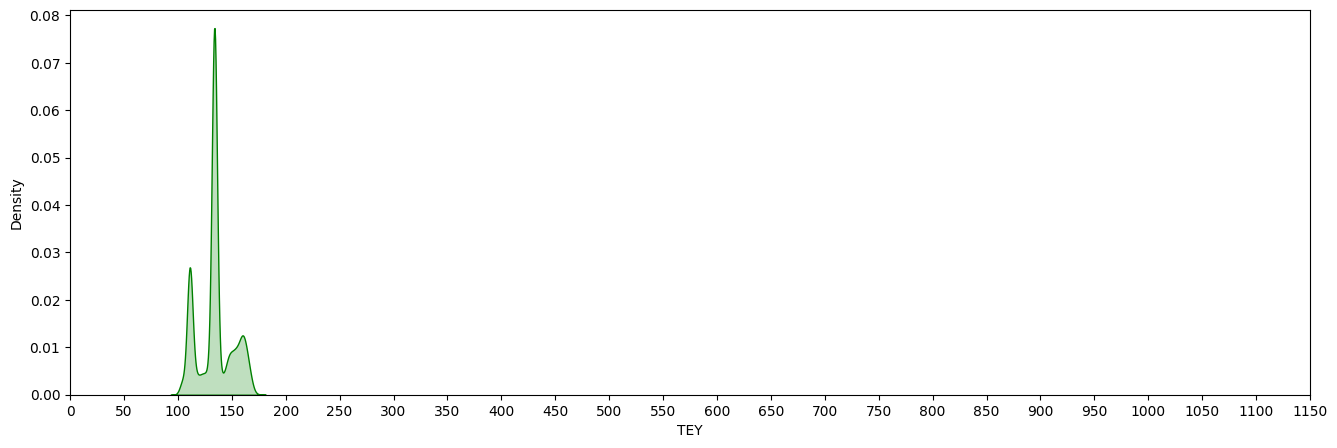

In [22]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['TEY'].skew()))
print("Kurtosis: {}".format(df['TEY'].kurtosis()))
ax = sns.kdeplot(df['TEY'], shade = True, color ='g')
plt.xticks([i for i in range(0, 1200, 50)])
plt.show()

In [30]:
df.shape

(15039, 11)

In [38]:
#transforming X veriables
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X1=scaler.fit_transform(df)
X1=pd.DataFrame(X1)
X1.columns=list(df)
X1.head()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
0 -1.439778 -0.826644  1.281436 -0.921232 -1.379101 -1.488376  0.585240   
1 -1.449601 -0.748647  1.304564 -0.921495 -1.363528 -1.482325  0.585240   
2 -1.434721 -0.686250  1.219086 -0.944385 -1.351309 -1.476275  0.568715   
3 -1.413702 -0.623853  1.169060 -0.946884 -1.348194 -1.464173  0.583969   
4 -1.368693 -0.545857  1.161883 -0.924389 -1.354663 -1.458123  0.582698   

        CDP        CO       NOX       TEY  
0 -1.357331  0.532012  1.387845 -1.231172  
1 -1.363676  0.568733  1.393002 -1.229909  
2 -1.360957  0.552938  1.363586 -1.230541  
3 -1.356424  0.548933  1.382878 -1.229909  
4 -1.350985  0.574179  1.348591 -1.229909

In [39]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   CDP     15039 non-null  float64
 8   CO      15039 non-null  float64
 9   NOX     15039 non-null  float64
 10  TEY     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [40]:
#spliting the data
X=X1.iloc[:,0:10]
print(X)
Y=X1.iloc[:,-1]
print(Y)

             AT        AP        AH      AFDP      GTEP       TIT       TAT  \
0     -1.439778 -0.826644  1.281436 -0.921232 -1.379101 -1.488376  0.585240   
1     -1.449601 -0.748647  1.304564 -0.921495 -1.363528 -1.482325  0.585240   
2     -1.434721 -0.686250  1.219086 -0.944385 -1.351309 -1.476275  0.568715   
3     -1.413702 -0.623853  1.169060 -0.946884 -1.348194 -1.464173  0.583969   
4     -1.368693 -0.545857  1.161883 -0.924389 -1.354663 -1.458123  0.582698   
...         ...       ...       ...       ...       ...       ...       ...   
15034 -1.153182 -1.185428  1.401860 -0.865850 -1.498657 -2.063184  0.103453   
15035 -1.303986 -1.138630  1.447753 -0.913470 -1.438759 -2.268905 -0.276638   
15036 -1.386267 -1.076233  1.476971 -0.951488 -1.410967 -2.789257 -1.026650   
15037 -1.420423 -0.998236  1.441590 -0.988848 -1.447624 -2.456474 -0.528337   
15038 -1.430734 -0.935839  1.334652 -1.016605 -1.464635 -2.051083  0.057689   

            CDP        CO       NOX  
0     -1.3573

In [41]:
#creating the training  and test data
from sklearn.model_selection  import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=42)

In [42]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(11279, 10) (3760, 10) (11279,) (3760,)


In [46]:
# Set random seed
#tf.random.set_seed(42)

# Create a new model (same as model_2)
df_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
df_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

In [47]:
# Fit the model
df_model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
353/353 [==============================] - 1s 2ms/step - loss: 0.0938 - mae: 0.0938
Epoch 2/100
353/353 [==============================] - 1s 3ms/step - loss: 0.0380 - mae: 0.0380
Epoch 3/100
353/353 [==============================] - 1s 2ms/step - loss: 0.0374 - mae: 0.0374
Epoch 4/100
353/353 [==============================] - 1s 3ms/step - loss: 0.0377 - mae: 0.0377
Epoch 5/100
353/353 [==============================] - 1s 4ms/step - loss: 0.0377 - mae: 0.0377
Epoch 6/100
353/353 [==============================] - 0s 1ms/step - loss: 0.0375 - mae: 0.0375
Epoch 7/100
353/353 [==============================] - 1s 1ms/step - loss: 0.0367 - mae: 0.0367
Epoch 8/100
353/353 [==============================] - 0s 1ms/step - loss: 0.0364 - mae: 0.0364
Epoch 9/100
353/353 [==============================] - 1s 1ms/step - loss: 0.0365 - mae: 0.0365
Epoch 10/100
353/353 [==============================] - 0s 1ms/step - loss: 0.0363 - mae: 0.0363
Epoch 11/100
353/353 [=================

In [48]:
mae_values = df_model.history.history['mae']
len(mae_values)

100

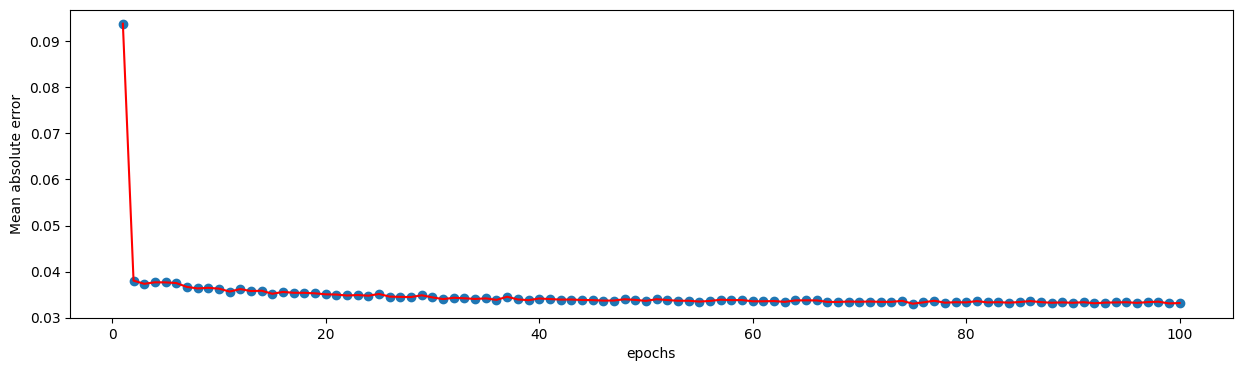

In [49]:
# see the error how it is reduced to minimum times for epoch=5
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 4))
plt.scatter(range(1,101),mae_values)
plt.plot(range(1,101),mae_values,color='red')
plt.ylabel("Mean absolute error")
plt.xlabel("epochs")
plt.show()


`# This is formatted as code`
```

 after looking at the graph , the error is not reducing after sometime....and its became consistent which is not use.

Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:

Increasing the number of layers (2 -> 3).

Increasing the number of units in each layer (except for the output layer).

Changing the optimizer (from SGD to Adam).

In [51]:
# Set random seed
tf.random.set_seed(24)

# Add an extra layer and increase number of units
df_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10), # 100 units
  tf.keras.layers.Dense(26), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
df_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't
                          metrics=['mae'])

In [52]:
# Fit the model and save the history (we can plot this)
df_model_2.fit(X_train, Y_train, epochs=100)

Epoch 1/100
353/353 [==============================] - 1s 2ms/step - loss: 0.0789 - mae: 0.0789
Epoch 2/100
353/353 [==============================] - 1s 2ms/step - loss: 0.0383 - mae: 0.0383
Epoch 3/100
353/353 [==============================] - 1s 2ms/step - loss: 0.0364 - mae: 0.0364
Epoch 4/100
353/353 [==============================] - 1s 2ms/step - loss: 0.0360 - mae: 0.0360
Epoch 5/100
353/353 [==============================] - 1s 2ms/step - loss: 0.0362 - mae: 0.0362
Epoch 6/100
353/353 [==============================] - 1s 2ms/step - loss: 0.0357 - mae: 0.0357
Epoch 7/100
353/353 [==============================] - 1s 2ms/step - loss: 0.0358 - mae: 0.0358
Epoch 8/100
353/353 [==============================] - 1s 2ms/step - loss: 0.0362 - mae: 0.0362
Epoch 9/100
353/353 [==============================] - 1s 2ms/step - loss: 0.0360 - mae: 0.0360
Epoch 10/100
353/353 [==============================] - 1s 2ms/step - loss: 0.0349 - mae: 0.0349
Epoch 11/100
353/353 [=================

In [53]:
mae_values = df_model_2.history.history['mae']
len(mae_values)

100

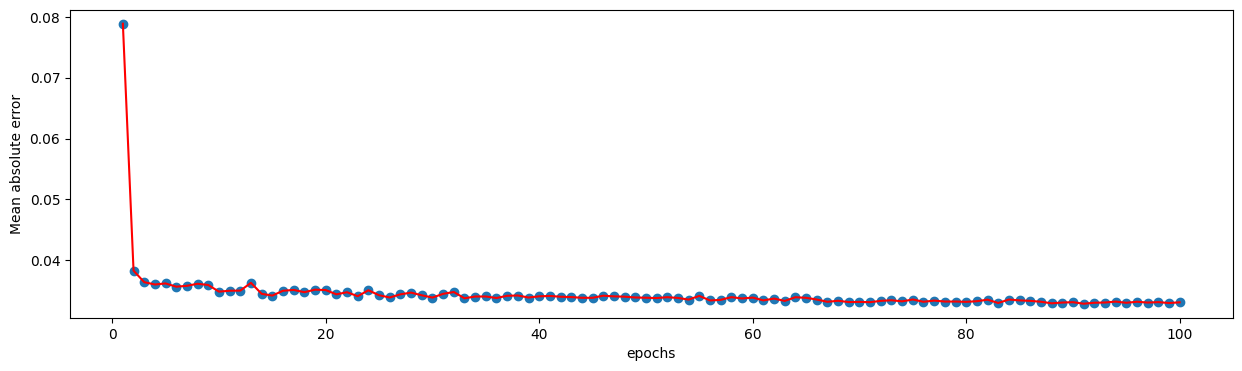

In [54]:
# see the error how it is reduced to minimum times for epoch=5
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 4))
plt.scatter(range(1,101),mae_values)
plt.plot(range(1,101),mae_values,color='red')
plt.ylabel("Mean absolute error")
plt.xlabel("epochs")
plt.show()

In [56]:
df_model_2.evaluate(X_test, Y_test)

118/118 [==============================] - 1s 3ms/step - loss: 0.0318 - mae: 0.0318


[0.03183772787451744, 0.03183772787451744]

#SGD optimizer

In [57]:
# Set random seed
tf.random.set_seed(24)

# Add an extra layer and increase number of units
df_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10), # 100 units
  tf.keras.layers.Dense(26), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
df_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=['mae'])

In [58]:
df_model_2.fit(X_train, Y_train, epochs=100)

Epoch 1/100
353/353 [==============================] - 2s 2ms/step - loss: 0.1118 - mae: 0.1118
Epoch 2/100
353/353 [==============================] - 1s 2ms/step - loss: 0.0613 - mae: 0.0613
Epoch 3/100
353/353 [==============================] - 1s 1ms/step - loss: 0.0529 - mae: 0.0529
Epoch 4/100
353/353 [==============================] - 1s 2ms/step - loss: 0.0497 - mae: 0.0497
Epoch 5/100
353/353 [==============================] - 1s 1ms/step - loss: 0.0467 - mae: 0.0467
Epoch 6/100
353/353 [==============================] - 1s 1ms/step - loss: 0.0451 - mae: 0.0451
Epoch 7/100
353/353 [==============================] - 1s 1ms/step - loss: 0.0422 - mae: 0.0422
Epoch 8/100
353/353 [==============================] - 1s 1ms/step - loss: 0.0416 - mae: 0.0416
Epoch 9/100
353/353 [==============================] - 1s 1ms/step - loss: 0.0410 - mae: 0.0410
Epoch 10/100
353/353 [==============================] - 1s 2ms/step - loss: 0.0400 - mae: 0.0400
Epoch 11/100
353/353 [=================

In [59]:

mae_values = df_model_2.history.history['mae']
len(mae_values)

100

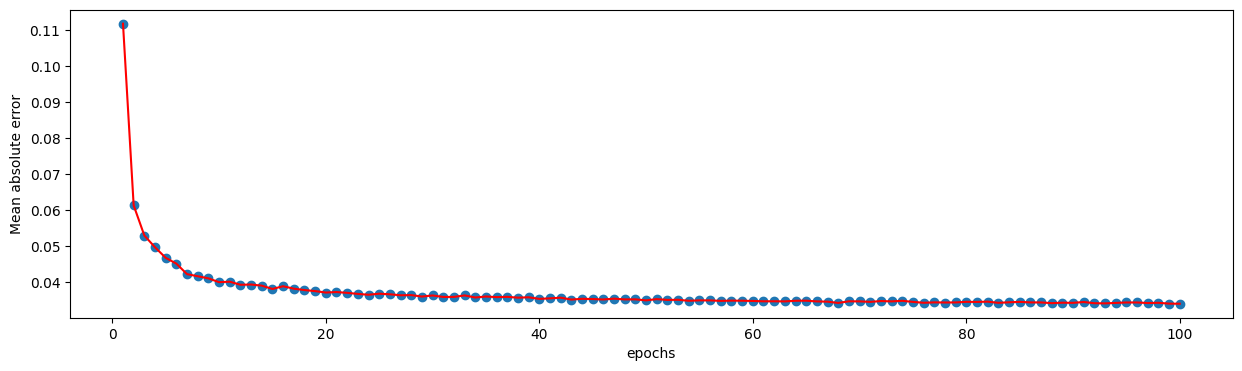

In [60]:
# see the error how it is reduced to minimum times for epoch=5
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 4))
plt.scatter(range(1,101),mae_values)
plt.plot(range(1,101),mae_values,color='red')
plt.ylabel("Mean absolute error")
plt.xlabel("epochs")
plt.show()

In [61]:
df_model_2.evaluate(X_test, Y_test)

118/118 [==============================] - 1s 3ms/step - loss: 0.0326 - mae: 0.0326


[0.03257099911570549, 0.03257099911570549]

In [62]:
df_model_2.evaluate(X_train, Y_train)

353/353 [==============================] - 1s 2ms/step - loss: 0.0333 - mae: 0.0333


[0.03332595154643059, 0.03332595154643059]